In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/mart_codeit/cluster.csv')

In [3]:
df.head(4)

,ID,signup_ym,birth_year,annual_income,matrimony,children,recency,amount_alcohol,amount_fruit,amount_meat,...,frequency_grade,monetary_grade,rfm_score,rfm_segment,age_group,monetary_log,Frequency,Monetary,Recency,cluster
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,2,3,2.4,3,50대,14.558447,0.454545,0.928402,0.414141,3
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,1,1.2,1,60대,10.465956,0.151515,0.270927,0.616162,2
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,3,2,2.6,3,50대,13.824272,0.575758,0.810453,0.737374,4
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,1,1,1.4,1,30대,11.140411,0.242424,0.379281,0.737374,2


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
def category(x):
    total = df.groupby('cluster').agg({x: 'sum'})
    return total

In [6]:
category(df.columns[7])

,amount_alcohol
cluster,
1,18441800
2,18593900
3,449814300
4,391046500


In [7]:
results = {}

for i in range(7, 13):  
    df_i = category(df.columns[i])  
    results[f'df_{i}'] = df_i  
    
    if i > 7: 
        df_prev = results[f'df_{i-1}']  
        df_i = pd.concat([df_i, df_prev], axis=1, join='outer') 

    results[f'df_{i}'] = df_i

In [8]:
category = results['df_12']
cluster= category.iloc[:, 0]
category.shape

(4, 6)

In [9]:
category

,amount_general,amount_snack,amount_fish,amount_meat,amount_fruit,amount_alcohol
cluster,,,,,,
1,8132800,2793700,3430700,11316500,2579200,18441800
2,8037900,2503800,3671200,10489700,2528500,18593900
3,58672900,39344500,53121900,240789900,36467600,449814300
4,51485200,33134400,48049300,217738300,34156200,391046500


In [10]:
category = category.reset_index()
category

,cluster,amount_general,amount_snack,amount_fish,amount_meat,amount_fruit,amount_alcohol
0,1,8132800,2793700,3430700,11316500,2579200,18441800
1,2,8037900,2503800,3671200,10489700,2528500,18593900
2,3,58672900,39344500,53121900,240789900,36467600,449814300
3,4,51485200,33134400,48049300,217738300,34156200,391046500


In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'

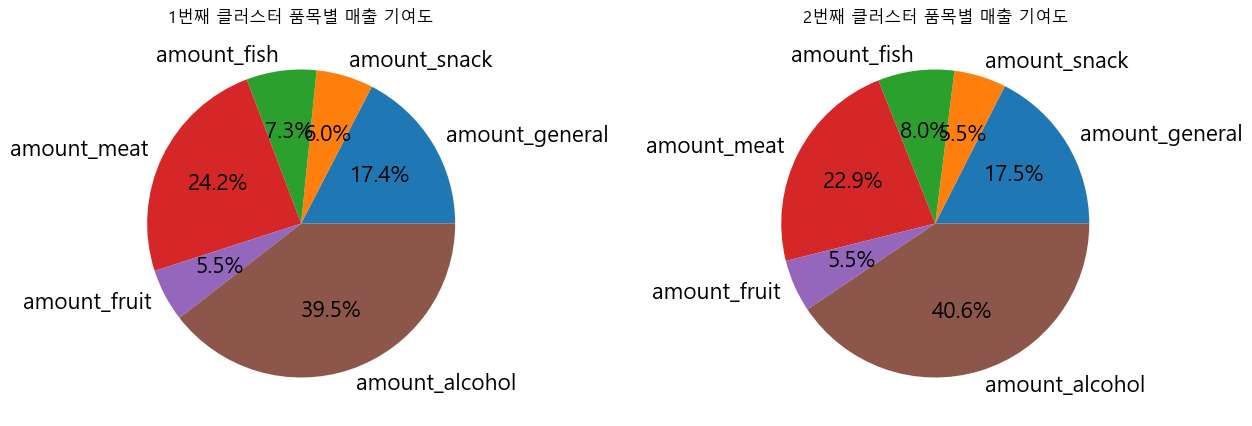

In [12]:
# 서브플롯 크기 조정 및 생성
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1행 3열의 서브플롯 생성

# 서브플롯의 레전드가 동일하므로 새로운 이미지로 레전드 표시
# fig, legend_ax = plt.subplots()

# 서브플롯
for i in range(1, 3):
    concat_i = pd.DataFrame(category.iloc[i-1, 1:7])
    
    # 파이차트 그리기
    concat_i.plot(kind='pie',
        y=concat_i.columns[0],
        autopct='%.1f%%',
        # labels=[f'{x}' for x in ag],
        title=f'{i}번째 클러스터 품목별 매출 기여도',
        ylabel='',
        legend=False,
        textprops={'fontsize': 16}, 
        ax = axes[i-1])

plt.show()

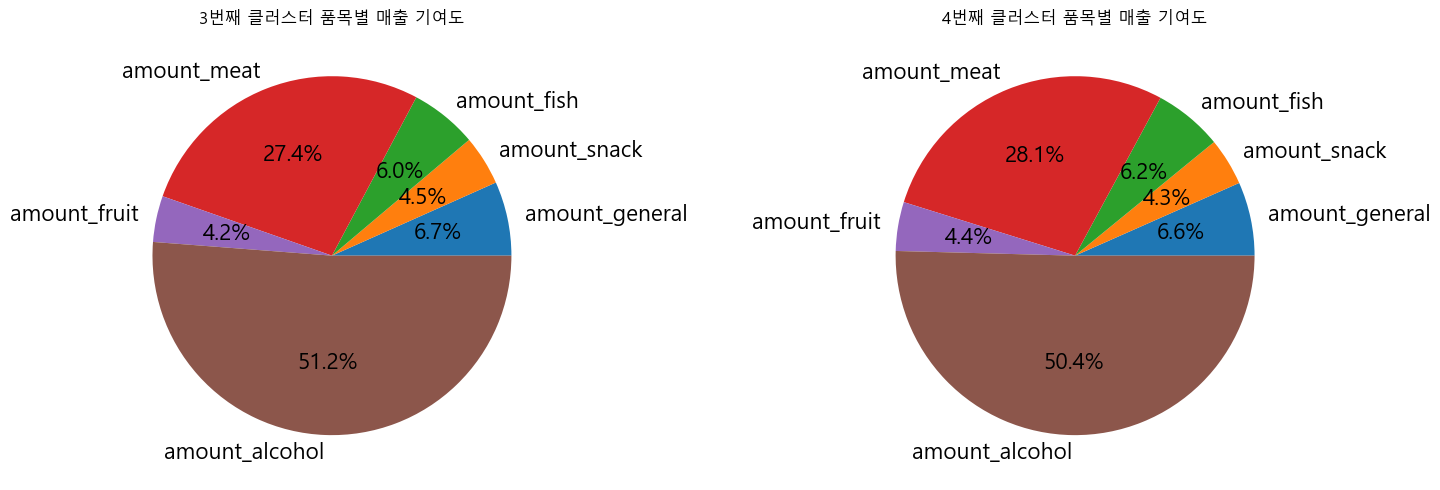

In [13]:
# 서브플롯 크기 조정 및 생성
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1행 2열의 서브플롯 생성

# 서브플롯
for i in range(3, 5):
# for idx, i in enumerate(range(3, 5)):
    concat_i = pd.DataFrame(category.iloc[i-1, 1:7])
    
    # 파이차트 그리기
    concat_i.plot(
        kind='pie',
        y=concat_i.columns[0],    # concat_i의 첫 번째 컬럼 선택
        autopct='%.1f%%',
        title=f'{i}번째 클러스터 품목별 매출 기여도',
        ylabel='',
        legend=False,
        textprops={'fontsize': 16},
        ax=axes[i-3])  # axes 인덱스를 idx로 변경

plt.tight_layout()
plt.show()

In [14]:
## 프로모션 참여율
pro = df.groupby('cluster')[['promotion_1', 'promotion_2', 'promotion_3', 'promotion_4', 'promotion_5', 'promotion_6']].sum()
pro

,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
cluster,,,,,,
1,0,0,24,6,0,16
2,0,2,39,2,0,65
3,68,15,46,86,82,91
4,74,13,54,70,79,161


In [15]:
print(df[df['cluster'] == 1].shape)
print(df[df['cluster'] == 2].shape)
print(df[df['cluster'] == 3].shape)
print(df[df['cluster'] == 4].shape)

(468, 36)
(463, 36)
(681, 36)
(601, 36)


In [16]:
pro_1 = pro.iloc[0, 0:]/468
pro_2 = pro.iloc[1, 0:]/463
pro_3 = pro.iloc[2, 0:]/681
pro_4 = pro.iloc[3, 0:]/601

In [17]:
promotion = pd.concat([pro_1, pro_2, pro_3, pro_4], axis=1)
promotion = promotion.T
promotion

,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
1,0.000000,0.000000,0.051282,0.012821,0.000000,0.034188
2,0.000000,0.004320,0.084233,0.004320,0.000000,0.140389
3,0.099853,0.022026,0.067548,0.126285,0.120411,0.133627
4,0.123128,0.021631,0.089850,0.116473,0.131448,0.267887


In [18]:
promotion.index.name = 'Cluster'
promotion

,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
Cluster,,,,,,
1,0.000000,0.000000,0.051282,0.012821,0.000000,0.034188
2,0.000000,0.004320,0.084233,0.004320,0.000000,0.140389
3,0.099853,0.022026,0.067548,0.126285,0.120411,0.133627
4,0.123128,0.021631,0.089850,0.116473,0.131448,0.267887


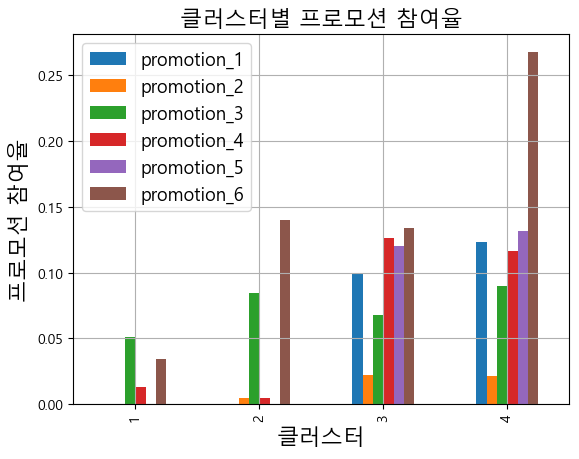

In [19]:
promotion.plot(kind='bar')
plt.title('클러스터별 프로모션 참여율', fontsize = 16)
plt.xlabel('클러스터', fontsize=16)
plt.ylabel('프로모션 참여율', fontsize=16)
plt.legend(fontsize=13)
plt.grid()

In [20]:
cluster_age = df.groupby(['cluster', 'age_group']).size()

In [21]:
cluster_age = pd.DataFrame(cluster_age)

In [22]:
ca = cluster_age.reset_index()

In [23]:
ca

,cluster,age_group,0
0,1,20대,32
1,1,30대,121
2,1,40대,154
3,1,50대,98
4,1,60대,60
5,1,80대,3
6,2,20대,38
7,2,30대,129
8,2,40대,178
9,2,50대,72


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26468\2800256559.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gen_i.plot(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26468\2800256559.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gen_i.plot(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26468\2800256559.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, s

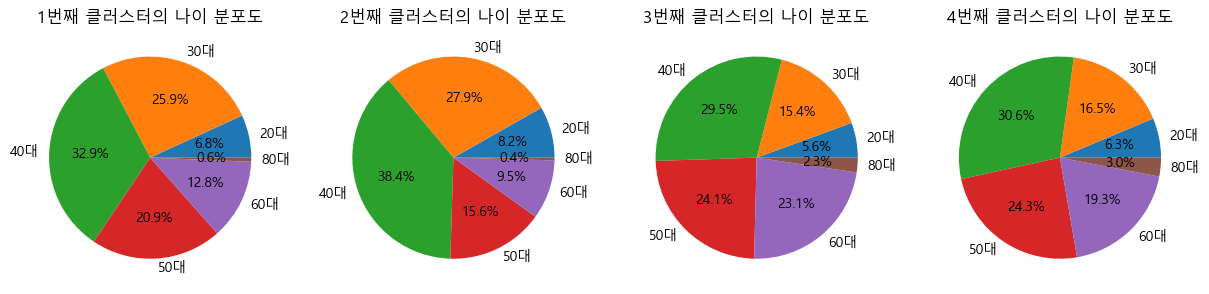

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ag = ['20대', '30대', '40대', '50대', '60대', '80대']

for i in range(1,5):
    gen_i = ca[ca['cluster']==i]
    gen_i = gen_i.T
    gen_i = gen_i.iloc[2,:]
    gen_i.plot(
    kind='pie',
    # y=gen_i.columns[0]
    title=f'{i}번째 클러스터의 나이 분포도',
    labels=[f'{x}' for x in ag],
    autopct='%.1f%%',
    ylabel='',
    ax = axes[i-1]
)

plt.show()

In [25]:
ch = df.groupby(['cluster','children']).size()
ch = pd.DataFrame(ch)
ch = ch.reset_index()
cha = ch.T.T

In [26]:
ch_01 = cha[cha['cluster'] == 1]
#ch = ch_01.T
#ch.iloc[2,:]
ch_01.T

,0,1,2,3
cluster,1,1,1,1
children,0,1,2,3
0,55,258,137,18


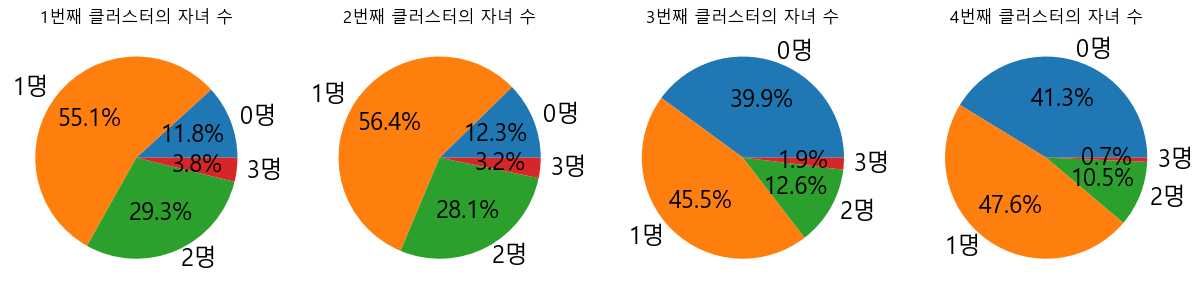

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1행 3열의 서브플롯 생성
ag = ['0명', '1명', '2명', '3명']

# 서브플롯
for i in range(1, 5):
    ch_i = ch[ch['cluster']==i]
    ch_i = ch_i.T
    ch_i = ch_i.iloc[2,:]
    
    # 파이차트 그리기
    ch_i.plot(
        kind='pie',
        # y=ch_i.columns[0],
        autopct='%.1f%%',
        labels=[f'{x}' for x in ag],
        title=f'{i}번째 클러스터의 자녀 수',
        ylabel='',
        textprops={'fontsize': 17},
        legend=False,
        ax = axes[i-1])

plt.show()

In [28]:
m = df.groupby(['cluster','matrimony']).size()
m = pd.DataFrame(m)
m = m.reset_index()
ma = m.T

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26468\3417376475.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m_i.plot(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26468\3417376475.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m_i.plot(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26468\3417376475.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, se

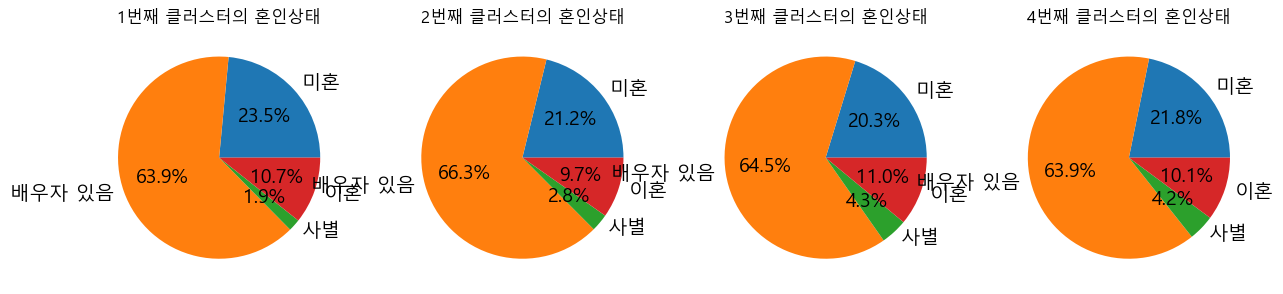

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1행 3열의 서브플롯 생성
ag = ['미혼', '배우자 있음', '사별', '이혼']

# 서브플롯
for i in range(1, 5):
    m_i = m[m['cluster']==i]
    m_i = m_i.T
    m_i = m_i.iloc[2,:]
    
    # 파이차트 그리기
    m_i.plot(
        kind='pie',
        # y=ch_i.columns[0],
        autopct='%.1f%%',
        labels=[f'{x}' for x in ag],
        title=f'{i}번째 클러스터의 혼인상태',
        ylabel='',
        legend=False,
        textprops={'fontsize': 14},
        ax = axes[i-1])

plt.show()